#METHOD___1

---



##importing libraries and loading dataset

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

pd.set_option('display.max_colwidth', None)
df = pd.read_csv("spam.csv", encoding='latin1')
print(df.head(6))

     v1  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   
5  spam   

                                                                                                                                                            v2  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't thi

In [80]:
print(df['v2'])

0                                                         Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                                                                           Ok lar... Joking wif u oni...
2             Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3                                                                                                                       U dun say so early hor... U c already then say...
4                                                                                                           Nah I don't think he goes to usf, he lives around here though
                                                                                      ...                                                             

##Data-Preprocessing

In [81]:
#renaming the columns
df = df.rename(columns={"v1": "label", "v2": "text"})

In [82]:
# Assuming 'df' is your DataFrame and you want the first two columns
dff = df[df.columns[0:2]]  # Select the first two columns of the DataFrame
print(dff.head(5))

  label  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                          text  
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                Ok lar... Joking wif u oni...  
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                            U dun say so early hor... U c already then say...  
4                                                                                                Nah I don't think he goes to us

In [83]:
rows, columns = dff.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 5572 rows and 2 columns.


In [84]:

import re
# Using .loc to avoid SettingWithCopyWarning
dff.loc[:, 'text'] = dff['text'].str.lower()  # Convert to lowercase
dff.loc[:, 'text'] = dff['text'].apply(lambda x: re.sub(r'\W', ' ', x))  # Remove non-word characters


In [85]:
print(dff['text'])

0                                                         go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   
1                                                                                                                                           ok lar    joking wif u oni   
2             free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3                                                                                                                       u dun say so early hor    u c already then say   
4                                                                                                           nah i don t think he goes to usf  he lives around here though
                                                                                      ...                                                             

In [86]:
dff.isnull().sum()  # Check for missing values

,0
label,0
text,0


In [87]:
dff['label'] = dff['label'].replace({'spam': 1, 'ham': 0})

<ipython-input-87-23cf828c79a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['label'] = dff['label'].replace({'spam': 1, 'ham': 0})


In [88]:
print(dff.head())
print(dff.info())

   label  \
0      0   
1      0   
2      1   
3      0   
4      0   

                                                                                                                                                          text  
0                                              go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat     
1                                                                                                                                ok lar    joking wif u oni     
2  free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s  
3                                                                                                            u dun say so early hor    u c already then say     
4                                                                                                nah i don t think he goes

##Graphs to visualize

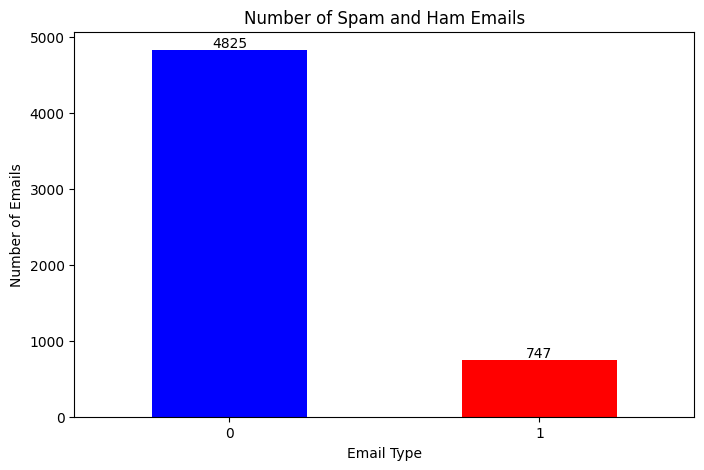

In [89]:
#visualizing the relation between the number of spam and ham mails
label_counts = dff['label'].value_counts()

# Plot the graph
plt.figure(figsize=(8, 5))
bars=label_counts.plot(kind='bar', color=['blue', 'red'])
# Adding the count on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,  # X and Y position
        f'{int(height)}',  # Text to display
        ha='center', va='bottom'  # Horizontal and vertical alignment
    )
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Ham Emails')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [90]:
dff_sub=dff.head(30)
dff_sub['word_count'] = dff_sub['text'].apply(lambda x: len(x.split()))

<ipython-input-90-f39ac3696194>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_sub['word_count'] = dff_sub['text'].apply(lambda x: len(x.split()))


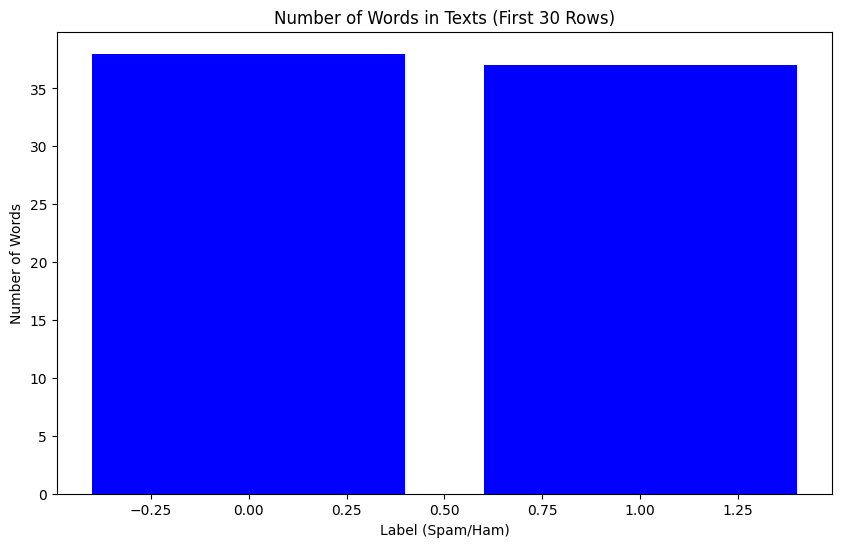

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(dff_sub['label'], dff_sub['word_count'], color='blue')
plt.xlabel('Label (Spam/Ham)')
plt.ylabel('Number of Words')
plt.title('Number of Words in Texts (First 30 Rows)')
plt.show()

In [92]:
dff.head()

,label,text
0,0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives around here though


##Train-Test Split

In [93]:
X = dff['text']
Y = dff['label']
X.head()

,text
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ok lar joking wif u oni
2,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,u dun say so early hor u c already then say
4,nah i don t think he goes to usf he lives around here though


In [94]:
Y.head()

,label
0,0
1,0
2,1
3,0
4,0


In [95]:
# splitting the data into 70% - 30% train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [96]:
#changing the data type of labels to int
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

##Feature-Extraction

In [97]:
#using TfIdVectorizer as a feature extractor as it assigns score to each text  in the emails
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

X_train_extracted = feature_extraction.fit_transform(X_train)
X_test_extracted = feature_extraction.transform(X_test)

##Model Fitting(Logistic)

In [98]:
#using the simple logistic regression model
model = LogisticRegression()

In [99]:
model.fit(X_train_extracted, Y_train)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
#accuracy test on training 70% data
predicted_train = model.predict(X_train_extracted)
train_accuracy = accuracy_score(Y_train, predicted_train)
print('Accuracy of training data: ', train_accuracy)

Accuracy of training data:  0.9638461538461538


##Accuracy on test data

In [101]:
#accuracy on the basis of 30% unseen test data
predicted_test = model.predict(X_test_extracted)
test_accuracy = accuracy_score(Y_test, predicted_test)
print('Accuracy of test data : ', test_accuracy)

Accuracy of test data :  0.9617224880382775


##Confusion-Matrix

Confusion Matrix:
[[1428    1]
 [  63  180]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1429
           1       0.99      0.74      0.85       243

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672



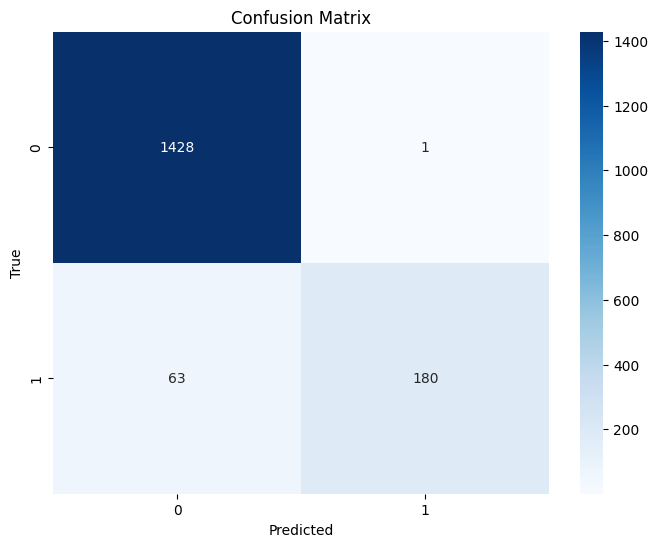

In [102]:
#confusion matrix for the test results
cm = confusion_matrix(Y_test, predicted_test)
print("Confusion Matrix:")
print(cm)

# Printing the Classification Report
print(classification_report(Y_test, predicted_test))

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#METHOD__2

#importing libraries and importing data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dp = pd.read_csv("spam.csv", encoding='latin1')

#Data-Preprocessing

In [71]:
# Preprocess data
dp = dp[['v1', 'v2']]
dp.columns = ['label', 'message']
dp['label'] = dp['label'].map({'ham': 0, 'spam': 1})
dp['message'] = dp['message'].str.lower()


#Train-Test Split

In [72]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dp['message'], dp['label'], test_size=0.3, random_state=3)


#Feature-Extraction

In [73]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#model-fitting

In [74]:
# Initialize and train Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [75]:

# Predict and evaluate model
Y_train_pred = nb_model.predict(X_train_tfidf)
Y_test_pred = nb_model.predict(X_test_tfidf)

#accuracy

In [76]:
# Accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9823076923076923
Test Accuracy: 0.9694976076555024


#confusion-matrix

Confusion Matrix:
[[1429    0]
 [  51  192]]


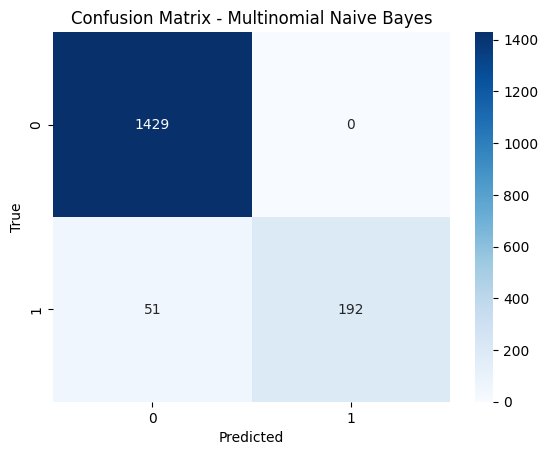

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1429
           1       1.00      0.79      0.88       243

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [77]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

# Classification report
print(classification_report(Y_test, Y_test_pred))

#Comparison

In [78]:
"""The email spam classification results show that the Multinomial
Naive Bayes classifier outperformed the Logistic Regression model.
The Naive Bayes model achieved a higher training accuracy of 98.23% and
test accuracy of 96.95%, compared to Logistic Regression's 96.38%
training accuracy and 96.17% test accuracy. The confusion matrix for
Naive Bayes indicates perfect classification for non-spam emails, with 0 false
positives, and a better precision score for spam detection (100%).
However, Logistic Regression showed a slightly better handling of spam recall,
albeit with a lower precision. Both models demonstrated high performance, but
Naive Bayes had a slight edge in overall accuracy and spam detection precision."""

"The email spam classification results show that the Multinomial\nNaive Bayes classifier outperformed the Logistic Regression model. \nThe Naive Bayes model achieved a higher training accuracy of 98.23% and \ntest accuracy of 96.95%, compared to Logistic Regression's 96.38% \ntraining accuracy and 96.17% test accuracy. The confusion matrix for \nNaive Bayes indicates perfect classification for non-spam emails, with 0 false\npositives, and a better precision score for spam detection (100%).\nHowever, Logistic Regression showed a slightly better handling of spam recall, \nalbeit with a lower precision. Both models demonstrated high performance, but\nNaive Bayes had a slight edge in overall accuracy and spam detection precision."